<h1>Problema de regresión</h1>

- Este conjunto de datos contiene precios de venta de viviendas para el condado de King, que incluye Seattle. Incluye viviendas vendidas entre mayo de 2014 y mayo de 2015.

-  Nuestro objetivo es crear un modelo de regresión utilizando la columna de precio.


**1. Análisis exploratorio** (2 puntos)
- Analiza los datos. ¿Cuántos datos hay?  (0,1)
- ¿Cuántas filas y columnas tiene?  (0,1)
- ¿Falta algún dato?  (0,2)
- Estadísticas del conjunto de datos  (0,2)
- Visualiza el precio, habitaciones y plantas (0,9)
- ¿Cuántas casas tienen un precio mayor a 3.000.000? (0,3)
- ¿Qué características piensas que tenemos que eliminar de nuestro dataset? (0,2)

**2. Preparamos los datos** (1,50 puntos)
 - Eliminar la columna id porque no tiene un significado especial para predecir los precios de la vivienda (0.25)
 - Vamos a ver si la fecha nos interesa o no
 pd.to_datetime(df["date"]), si lo analizamos nos daríamos cuenta que no hay correlación. Por lo tanto, eliminamos fechas (0.25)
 - Nos pasa lo mismo con los Códigos Postales, los eliminamos también ya que lo tratará esto como un valor continuo y luego causará predicciones incorrectas. (0.25)
 - Nos pasa lo mismo con los años, no nos interesa el año de la reforma, más bien si ha estado reformada o no. (0.75)


 **3. Spliteamos** (2,5 puntos)
 - Recordad que lo que queremos predecir es el precio de la vivienda :-)
 - 30% para test (0,5)
 - ¿Cuántos valores tenemos en cada conjunto de entrenamiento y de test?(0,5)
 - Utilice la biblioteca Keras para construir una red neuronal con tres capas y la primera capa con 32 neuronas. (0,5)
 - Adam Optimizer como nuestro optimizador y el error cuadrático medio como nuestra función de pérdida para nuestro modelo de aprendizaje profundo. (0,5)
 - Entrena el modelo con 200 épocas y en lotes de 128
 - Realiza un summary y explícamelo. ( 0,5 puntos)


 **4. Predice el modelo** ( 2 puntos)
 Predicción y evaluación del desempeño del modelo.
 Dibuja el valor de pérdida

 **5. Reentrena nuestro modelo** ( 2 puntos)
 - ¿Qué paso nos hemos saltado que mejoraría nuestro modelo?

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# 1. Análisis exploratiorio

In [2]:
data = pd.read_csv('house_data.csv')

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [5]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
price, bedrooms, floors = data['price'], data['bedrooms'], data['floors'] 

<Axes: xlabel='price', ylabel='Count'>

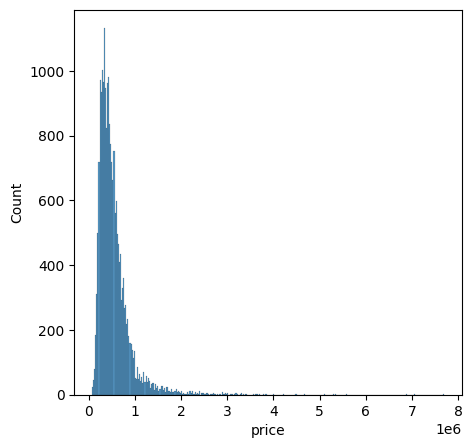

In [7]:
plt.figure(figsize = (5, 5))
sns.histplot(price)

<Axes: xlabel='bedrooms', ylabel='Count'>

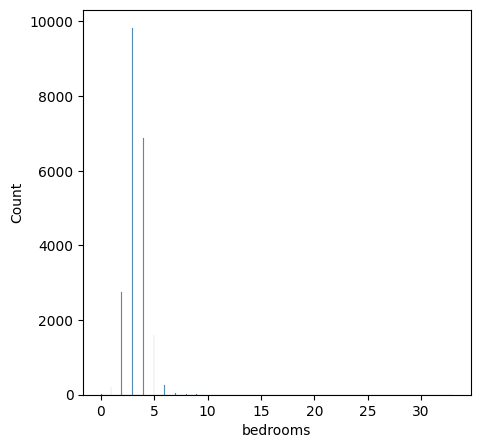

In [8]:
plt.figure(figsize = (5, 5))
sns.histplot(bedrooms)

<Axes: xlabel='floors', ylabel='Count'>

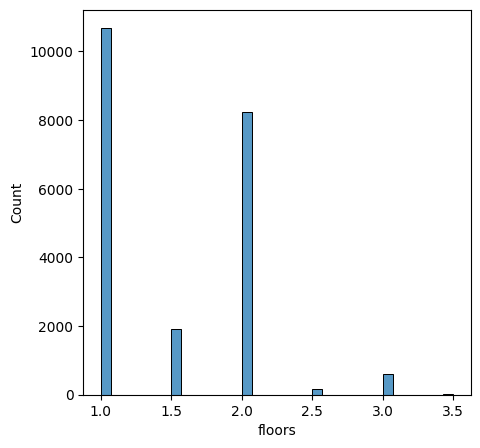

In [9]:
plt.figure(figsize = (5, 5))
sns.histplot(floors)


In [10]:
""" Eliminaria la tabla id y zipcode ya que no las considero realmente necesarias para predecir el precio de la vivienda """
data.head(100)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1483300570,20140908T000000,905000.0,4,2.50,3300,10250,1.0,0,0,...,7,2390,910,1946,1991,98040,47.5873,-122.249,1950,6045
96,3422049190,20150330T000000,247500.0,3,1.75,1960,15681,1.0,0,0,...,7,1960,0,1967,0,98032,47.3576,-122.277,1750,15616
97,1099611230,20140912T000000,199000.0,4,1.50,1160,6400,1.0,0,0,...,7,1160,0,1975,0,98023,47.3036,-122.378,1160,6400
98,722079104,20140711T000000,314000.0,3,1.75,1810,41800,1.0,0,0,...,7,1210,600,1980,0,98038,47.4109,-121.958,1650,135036


# 2. Preparamos los datos

In [11]:
data = data.drop('id', axis=1)
data.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [12]:
pd.to_datetime(data["date"])

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

In [13]:
data = data.drop('date', axis=1)
data.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [14]:
data = data.drop('zipcode', axis=1)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [15]:
data['yr_renovated'] = data['yr_renovated'].map(lambda s: 1 if s != 0 else 0)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


# 3. Spliteamos

In [16]:
atributos = data.drop('price', axis = 1)
objetivo = data['price']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(atributos, objetivo ,train_size=0.3)

In [18]:
X_train.count()

bedrooms         6483
bathrooms        6483
sqft_living      6483
sqft_lot         6483
floors           6483
waterfront       6483
view             6483
condition        6483
grade            6483
sqft_above       6483
sqft_basement    6483
yr_built         6483
yr_renovated     6483
lat              6483
long             6483
sqft_living15    6483
sqft_lot15       6483
dtype: int64

In [19]:
X_test.count()

bedrooms         15130
bathrooms        15130
sqft_living      15130
sqft_lot         15130
floors           15130
waterfront       15130
view             15130
condition        15130
grade            15130
sqft_above       15130
sqft_basement    15130
yr_built         15130
yr_renovated     15130
lat              15130
long             15130
sqft_living15    15130
sqft_lot15       15130
dtype: int64

In [20]:
y_train.count()

6483

In [21]:
y_test.count()

15130

In [22]:
model = keras.models.Sequential([
    keras.layers.Dense(32, activation = 'relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(16, activation = 'relu'),
    keras.layers.Dense(8, activation = 'relu')
])
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

In [23]:
# (X_train_val, y_train_val), (X_test, y_test) = data

In [24]:
# X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3)

In [25]:
# train_mean_x = X_train.mean()
# train_std_x = X_train.std()

# X_train_norm = (X_train - train_mean_x) / train_std_x
# X_val_norm = (X_val - train_mean_x) / train_std_x
# X_test_norm = (X_test - train_mean_x) / train_std_x

In [26]:
# history_reg = model.fit(X_train, y_train, epochs = 200, batch_size = 128, validation_data = (X_val_norm, y_val))
history_reg = model.fit(X_train, y_train, epochs = 200, batch_size = 128)

Epoch 1/200


51/51 [==============================] - 1s 2ms/step - loss: 423264550912.0000 - mse: 423264550912.0000 - mae: 534173.5000
Epoch 2/200
51/51 [==============================] - 0s 1ms/step - loss: 407297327104.0000 - mse: 407297327104.0000 - mae: 520228.6562
Epoch 3/200
51/51 [==============================] - 0s 2ms/step - loss: 369845043200.0000 - mse: 369845043200.0000 - mae: 483071.1562
Epoch 4/200
51/51 [==============================] - 0s 2ms/step - loss: 335930720256.0000 - mse: 335930720256.0000 - mae: 445362.7500
Epoch 5/200
51/51 [==============================] - 0s 2ms/step - loss: 315110260736.0000 - mse: 315110260736.0000 - mae: 419321.2812
Epoch 6/200
51/51 [==============================] - 0s 1ms/step - loss: 293575852032.0000 - mse: 293575852032.0000 - mae: 391562.5312
Epoch 7/200
51/51 [==============================] - 0s 2ms/step - loss: 268086280192.0000 - mse: 268086280192.0000 - mae: 370648.4688
Epoch 8/200
51/51 [==============================] - 

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                576       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
Total params: 1240 (4.84 KB)
Trainable params: 1240 (4.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# 4. Predice el modelo

In [28]:
model.predict(X_test)

473/473 [==============================] - 1s 1ms/step


array([[ 303082.  ,  302218.2 ,  298652.34, ...,  298591.  ,  299655.97,
         301092.9 ],
       [ 344406.3 ,  344360.25,  342875.38, ...,  343007.16,  343311.22,
         343407.16],
       [1130794.4 , 1132673.2 , 1136338.6 , ..., 1136965.2 , 1135537.2 ,
        1133157.4 ],
       ...,
       [ 190531.77,  189423.89,  185381.89, ...,  185145.1 ,  186549.1 ,
         188157.53],
       [1158433.4 , 1159811.5 , 1161732.5 , ..., 1162471.2 , 1161355.6 ,
        1160104.8 ],
       [ 234101.23,  233692.73,  231463.28, ...,  231453.39,  231926.62,
         232586.39]], dtype=float32)

In [29]:
model.evaluate(X_test, y_test)

473/473 [==============================] - 1s 1ms/step - loss: 64514867200.0000 - mse: 64514867200.0000 - mae: 169641.8906


[64514867200.0, 64514867200.0, 169641.890625]

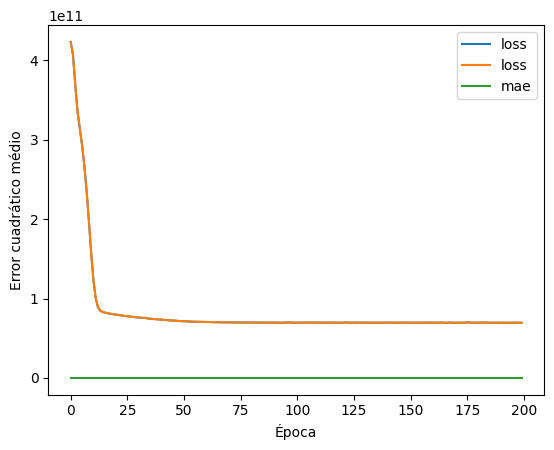

In [31]:
def plot_history():
    plt.plot(history_reg.history['loss'], label="loss")
    plt.plot(history_reg.history['mse'], label="loss")
    # plt.plot(history_reg.history['val_mse'], label="loss")
    plt.plot(history_reg.history['mae'], label="mae")
    plt.ylabel('Error cuadrático médio')
    plt.xlabel('Época')
    plt.legend(loc="upper right")

plot_history()

# 5. Reentrena nuestro modelo

In [32]:
history_reg = model.fit(X_train, y_train, epochs = 200, batch_size = 128)

Epoch 1/200
51/51 [==============================] - 0s 2ms/step - loss: 69515567104.0000 - mse: 69515567104.0000 - mae: 172644.6406
Epoch 2/200
51/51 [==============================] - 0s 2ms/step - loss: 69838577664.0000 - mse: 69838577664.0000 - mae: 173415.5156
Epoch 3/200
51/51 [==============================] - 0s 1ms/step - loss: 69517254656.0000 - mse: 69517254656.0000 - mae: 172648.9531
Epoch 4/200
51/51 [==============================] - 0s 2ms/step - loss: 69481971712.0000 - mse: 69481971712.0000 - mae: 172404.5312
Epoch 5/200
51/51 [==============================] - 0s 2ms/step - loss: 69591277568.0000 - mse: 69591277568.0000 - mae: 172314.4219
Epoch 6/200
51/51 [==============================] - 0s 1ms/step - loss: 69636268032.0000 - mse: 69636268032.0000 - mae: 173167.2812
Epoch 7/200
51/51 [==============================] - 0s 1ms/step - loss: 69481562112.0000 - mse: 69481562112.0000 - mae: 172311.7969
Epoch 8/200
51/51 [==============================] - 0s 1ms/step - lo